# ML Base introduce
- Perceptron
- linear regression & logistic regression
- CNN
- RNN
- DNN

## by Cloud.yu 2018-2-9

# Perceptron  (感知机)

>感知机模型: $f(x)=sign(wx+b)$, 其中$w$叫做权重(weight)， $b$叫做偏置(bias)

>线性几何平面: $wx+b=0$

- PLA
- Pocket


![](test.gif)

----
# PLA  (Percetron Learning Algorithm)
----
- **Input**: traing data ($T = \{(x_{0}, y_{0}), (x_{1}, y_{1}), ..., (x_{i}, y_{i})\}$) 
- **Output**: $(w, b)$
    - init $(w, b)\rightarrow(0,0)$ , $i\rightarrow 0$
    - while $i != len(T)$ do
        - if $y_{i}(wx_{i}+b) <= 0$ then
            - $(w, b) \rightarrow (w, b) + y_{i}x_{i}$
            - $i\rightarrow 0$
        - else
            - $i=i+1$
        - end if
    - end while
----



![](pla.png)

2


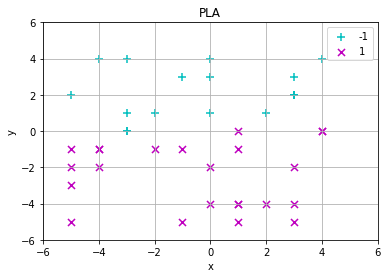

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

LEN = 40
x = np.random.randint(-5,5, (LEN,2))
line = np.random.randint(-5,5, (2, 1))
#  2y - 3x
label = np.sign(np.dot(x, line))
label[label == 0] = 1
fig = plt.figure(1)
idx_0 = np.where(label[:, 0] == -1)
p0 = plt.scatter(x[idx_0,1], x[idx_0,0], marker = '+', color = 'c', label='-1', s = 50)
idx_1 = np.where(label[:, 0] == 1)
p1 = plt.scatter(x[idx_1,1], x[idx_1,0], marker = 'x', color = 'm', label='1', s = 50)
plt.title('PLA')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend()
plt.grid(True)
plt.show()

In [3]:
cnt = 0
pla = np.zeros((2,1))
_update = 0

while cnt<LEN:
    _update = np.sign(np.dot(x[cnt,:], pla)) * label[cnt, 0]
    if _update <= 0:
        _x = x[cnt, :]
        _x.shape = (1,2)
        _x = np.transpose(_x)
        pla = pla + _x*label[cnt, 0]
        cnt = 0
    else:
        cnt = cnt+1
        continue
print(pla)



    

[[-6.]
 [ 1.]]


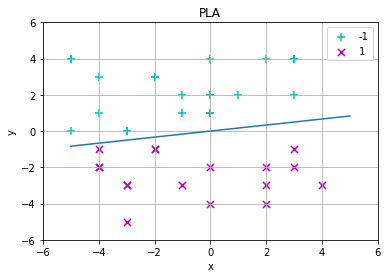

In [4]:
fig = plt.figure(1)
idx_0 = np.where(label[:, 0] == -1)
p0 = plt.scatter(x[idx_0,1], x[idx_0,0], marker = '+', color = 'c', label='-1', s = 50)
idx_1 = np.where(label[:, 0] == 1)
p1 = plt.scatter(x[idx_1,1], x[idx_1,0], marker = 'x', color = 'm', label='1', s = 50)
plt.title('PLA')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend()
plt.grid(True)

k = -pla[1,:] / pla[0,:]
line_x = np.linspace(-5,5,50) 
line_y = k*line_x
plt.plot(line_x,line_y)
plt.show()

----
# POCKET Algorithm
----
- **Input**: traing data ($T = \{(x_{0}, y_{0}), (x_{1}, y_{1}), ..., (x_{i}, y_{i})\}$)
- **Output**: $(w, b)$
    - init $(w_{best}, b_{best}) \rightarrow random$
    - $loss_{min} \leftarrow sum(sign(w_{best}x + b_{best}) != y)$
    - for $i= 0\rightarrow1000$ do
        - init $(w, b)\rightarrow random$ and $j\rightarrow 0$
        - Save error label data to $T_{error} = \{(x_{0}, y_{0}), (x_{1}, y_{1}), ..., (x_{err}, y_{err})\}$
        - while $j != len(T_{error})$ do
            - $(\bar{w}, \bar{b}) \rightarrow (w, b) + y_{j}x_{j}$
            - $loss \leftarrow sum(sign(\bar{w}x + \bar{b}) != y)$
            - if $loss < loss_{min}$ then
                - break
            - end if
            - $j=j+1$
        - end while
        - if $j != len(y_{err})$
           - $(w_{best}, b_{best}) \leftarrow (\bar{w}, \bar{b})$
           - $loss_{min} \leftarrow loss$
        - end if
        - j = 0
    - end for
----

In [6]:
def cal_loss(_pocket, _x, _label):
    _cal = np.sign(np.dot(_x, _pocket))
    _cal.shape = (40,1)
    idx = np.where(_cal[:, 0] != _label[:, 0])
    loss = np.sum(_cal[:, 0] != _label[:, 0])
    return list(idx[0]), loss

# random init best pocket and min loss value
pocket_best = np.random.randint(-5,5, (2,1))
_, min_loss = cal_loss(pocket_best, x, label)


for i in range(15):
    # random pocket and cur loss for each period
    pocket = np.random.randint(-5,5, (2,1))
    _pocket = pocket
    idx, cur_loss = cal_loss(pocket, x, label)
    while cnt < len(idx):
        _x = x[idx[cnt], :]
        _x.shape = (2,1)
        _pocket = pocket + _x * label[idx[cnt], 0]
        _, cur_loss = cal_loss(_pocket, x, label)
        # compare cur loss with min loss
        if cur_loss < min_loss:
            break
        else:
            cnt = cnt + 1
    if cnt != len(idx):
        pocket_best = _pocket
        _, min_loss = cal_loss(pocket_best, x, label)
    cnt = 0

pocket = pocket_best
print(pocket)

[[-6]
 [ 1]]


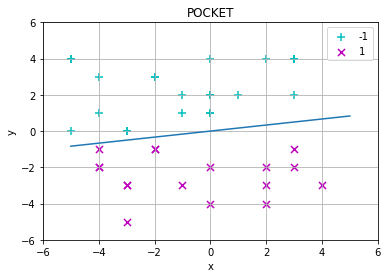

In [7]:
fig = plt.figure(1)
idx_0 = np.where(label[:, 0] == -1)
p0 = plt.scatter(x[idx_0,1], x[idx_0,0], marker = '+', color = 'c', label='-1', s = 50)
idx_1 = np.where(label[:, 0] == 1)
p1 = plt.scatter(x[idx_1,1], x[idx_1,0], marker = 'x', color = 'm', label='1', s = 50)
plt.title('POCKET')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend()
plt.grid(True)

k = -pocket[1,:] / pocket[0,:]
line_x = np.linspace(-5,5,50) 
line_y = k*line_x
plt.plot(line_x,line_y)
plt.show()

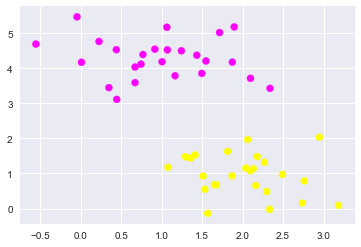

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
seaborn.set()
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

-0.7541740493109252 -0.43660961990940284
-0.7541740493109252 -0.22249355429060286
-0.7541740493109252 -0.00837748867180288
-0.7541740493109252 0.20573857694699715
-0.7541740493109252 0.4198546425657971
-0.7541740493109252 0.633970708184597
-0.7541740493109252 0.8480867738033971
-0.7541740493109252 1.0622028394221972
-0.7541740493109252 1.276318905040997
-0.7541740493109252 1.490434970659797
-0.7541740493109252 1.704551036278597
-0.7541740493109252 1.9186671018973969
-0.7541740493109252 2.1327831675161972
-0.7541740493109252 2.346899233134997
-0.7541740493109252 2.561015298753797
-0.7541740493109252 2.775131364372597
-0.7541740493109252 2.989247429991397
-0.7541740493109252 3.203363495610197
-0.7541740493109252 3.4174795612289968
-0.7541740493109252 3.6315956268477967
-0.7541740493109252 3.8457116924665966
-0.7541740493109252 4.0598277580853965
-0.7541740493109252 4.2739438237041965
-0.7541740493109252 4.488059889322996
-0.7541740493109252 4.702175954941797
-0.7541740493109252 4.9162920

1.956917754804801 3.6315956268477967
1.956917754804801 3.8457116924665966
1.956917754804801 4.0598277580853965
1.956917754804801 4.2739438237041965
1.956917754804801 4.488059889322996
1.956917754804801 4.702175954941797
1.956917754804801 4.916292020560597
1.956917754804801 5.130408086179397
1.956917754804801 5.344524151798197
1.956917754804801 5.558640217416997
1.956917754804801 5.772756283035797
2.0996067971266807 -0.43660961990940284
2.0996067971266807 -0.22249355429060286
2.0996067971266807 -0.00837748867180288
2.0996067971266807 0.20573857694699715
2.0996067971266807 0.4198546425657971
2.0996067971266807 0.633970708184597
2.0996067971266807 0.8480867738033971
2.0996067971266807 1.0622028394221972
2.0996067971266807 1.276318905040997
2.0996067971266807 1.490434970659797
2.0996067971266807 1.704551036278597
2.0996067971266807 1.9186671018973969
2.0996067971266807 2.1327831675161972
2.0996067971266807 2.346899233134997
2.0996067971266807 2.561015298753797
2.0996067971266807 2.77513136

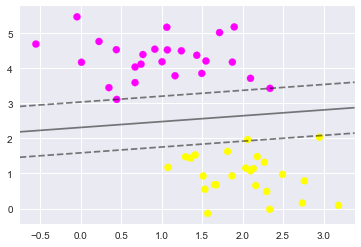

In [14]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            print(xi,yj)
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [49]:
import tensorflow as tf
import numpy as np

_x = np.random.randint(0, 10, (2, 3)).tolist()
x = tf.placeholder("float", [None, 3])
xs = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data1 = [[1, 2, 3],
              [4, 5, 6],]
    print(x_data1)
    print(_x)
    #print(x_data1.shape)
    #print(_x.shape)
    print(type(x_data1))
    print(type(_x))
    
    result = session.run(y, feed_dict={x: x_data1})
    result = session.run(y, feed_dict={x: _x})
    print(result)

[[1, 2, 3], [4, 5, 6]]
[[0, 4, 3], [5, 2, 7]]
<class 'list'>
<class 'list'>
[[ 0.  8.  6.]
 [10.  4. 14.]]
